# the data analysis of the wind farms

In [1]:
# upload the data from .xslx files
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site4 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 4 (Nominal capacity-66MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site5 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 5 (Nominal capacity-36MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site6 = pd.read_excel(r'data_processed/wind_farms/Wind farm site 6 (Nominal capacity-96MW).xlsx'
                                ).drop(index=0)

In [2]:
Dataset_WF_site2.head()

Time(year-month-day h:m:s)  Wind speed at height of 10 meters (m/s)  \
1        2019-01-01 00:15:00                                    2.951   
2        2019-01-01 00:30:00                                    2.951   
3        2019-01-01 00:45:00                                    2.186   
4        2019-01-01 01:00:00                                    2.033   
5        2019-01-01 01:15:00                                    2.339   

   Wind direction at height of 10 meters (˚)  \
1                                    129.697   
2                                    124.756   
3                                    129.019   
4                                    121.358   
5                                    131.853   

   Wind speed at height of 30 meters (m/s)  \
1                                    2.951   
2                                    3.563   
3                                    2.339   
4                                    1.880   
5                                    3.563   

   Wind direction at height of 30 meters (˚)  \
1                                    118.488   
2                                    118.210   
3                                    112.761   
4                                    105.626   
5                                    122.411   

   Wind speed at height of 50 meters (m/s)  \
1                                    2.951   
2                                    2.798   
3                                    2.339   
4                                    2.186   
5                                    2.951   

   Wind direction at height of 50 meters (˚)  \
1                                     97.463   
2                                     91.528   
3                                     94.015   
4                                     99.392   
5                                    108.440   

   Wind speed - at the height of wheel hub  (m/s)  \
1                                           2.186   
2                                           2.492   
3                                           1.281   
4                                           2.186   
5                                           2.033   

   Wind speed - at the height of wheel hub (˚)  Air temperature  (°C)   \
1                                      108.914                 -12.992   
2                                       97.322                 -12.745   
3                                       99.393                 -12.904   
4                                       95.703                 -12.979   
5                                      107.327                 -12.772   

   Atmosphere (hpa)  Power (MW)  
1           887.227   36.811337  
2           887.094   31.172535  
3           887.214   27.836002  
4           887.227   31.192802  
5           887.107   35.726536

In [4]:
for dataset in [Dataset_WF_site1, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site6]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']
    
for dataset in [Dataset_WF_site2]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Power(MW)']
    
for dataset in [Dataset_WF_site5]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Power(MW)']

In [5]:
Dataset_WF_site1.head()

time  WS_10   WD_10  WS_30   WD_30  WS_50   WD_50  WS_cen  \
1  2019-01-01 00:15:00  1.828  77.460  1.698  75.048  1.757  88.733   1.882   
2  2019-01-01 00:30:00  2.193  86.700  2.313  84.688  2.344  89.100   2.350   
3  2019-01-01 00:45:00  2.654  78.160  2.494  74.939  2.574  87.267   2.808   
4  2019-01-01 01:00:00  2.249  94.297  2.192  91.140  2.558  96.900   2.924   
5  2019-01-01 01:15:00  1.974  92.933  1.980  91.921  2.049  97.000   2.137   

    WD_cen   Air_T    Air_P   Air_H  Power(MW)  
1   74.367 -13.691  889.575  76.757   0.329703  
2   89.000 -13.766  889.942  76.981   0.296306  
3   82.733 -13.691  889.675  76.821   0.187590  
4   92.967 -13.447  890.025  74.571   0.081005  
5  100.133 -13.983  889.692  71.808   0.189721

In [6]:
# missing data and outliers processing
from collections import Counter
# Counter(Dataset_WF_site1['WS_10']).most_common()
Dataset_WF_site3['Air_T'].value_counts()

 26.460    11201
 0.000       118
 25.250       58
 14.810       58
 25.530       56
           ...  
-0.592         1
 0.976         1
 2.019         1
-1.436         1
-5.178         1
Name: Air_T, Length: 10937, dtype: int64

c:\users\q\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


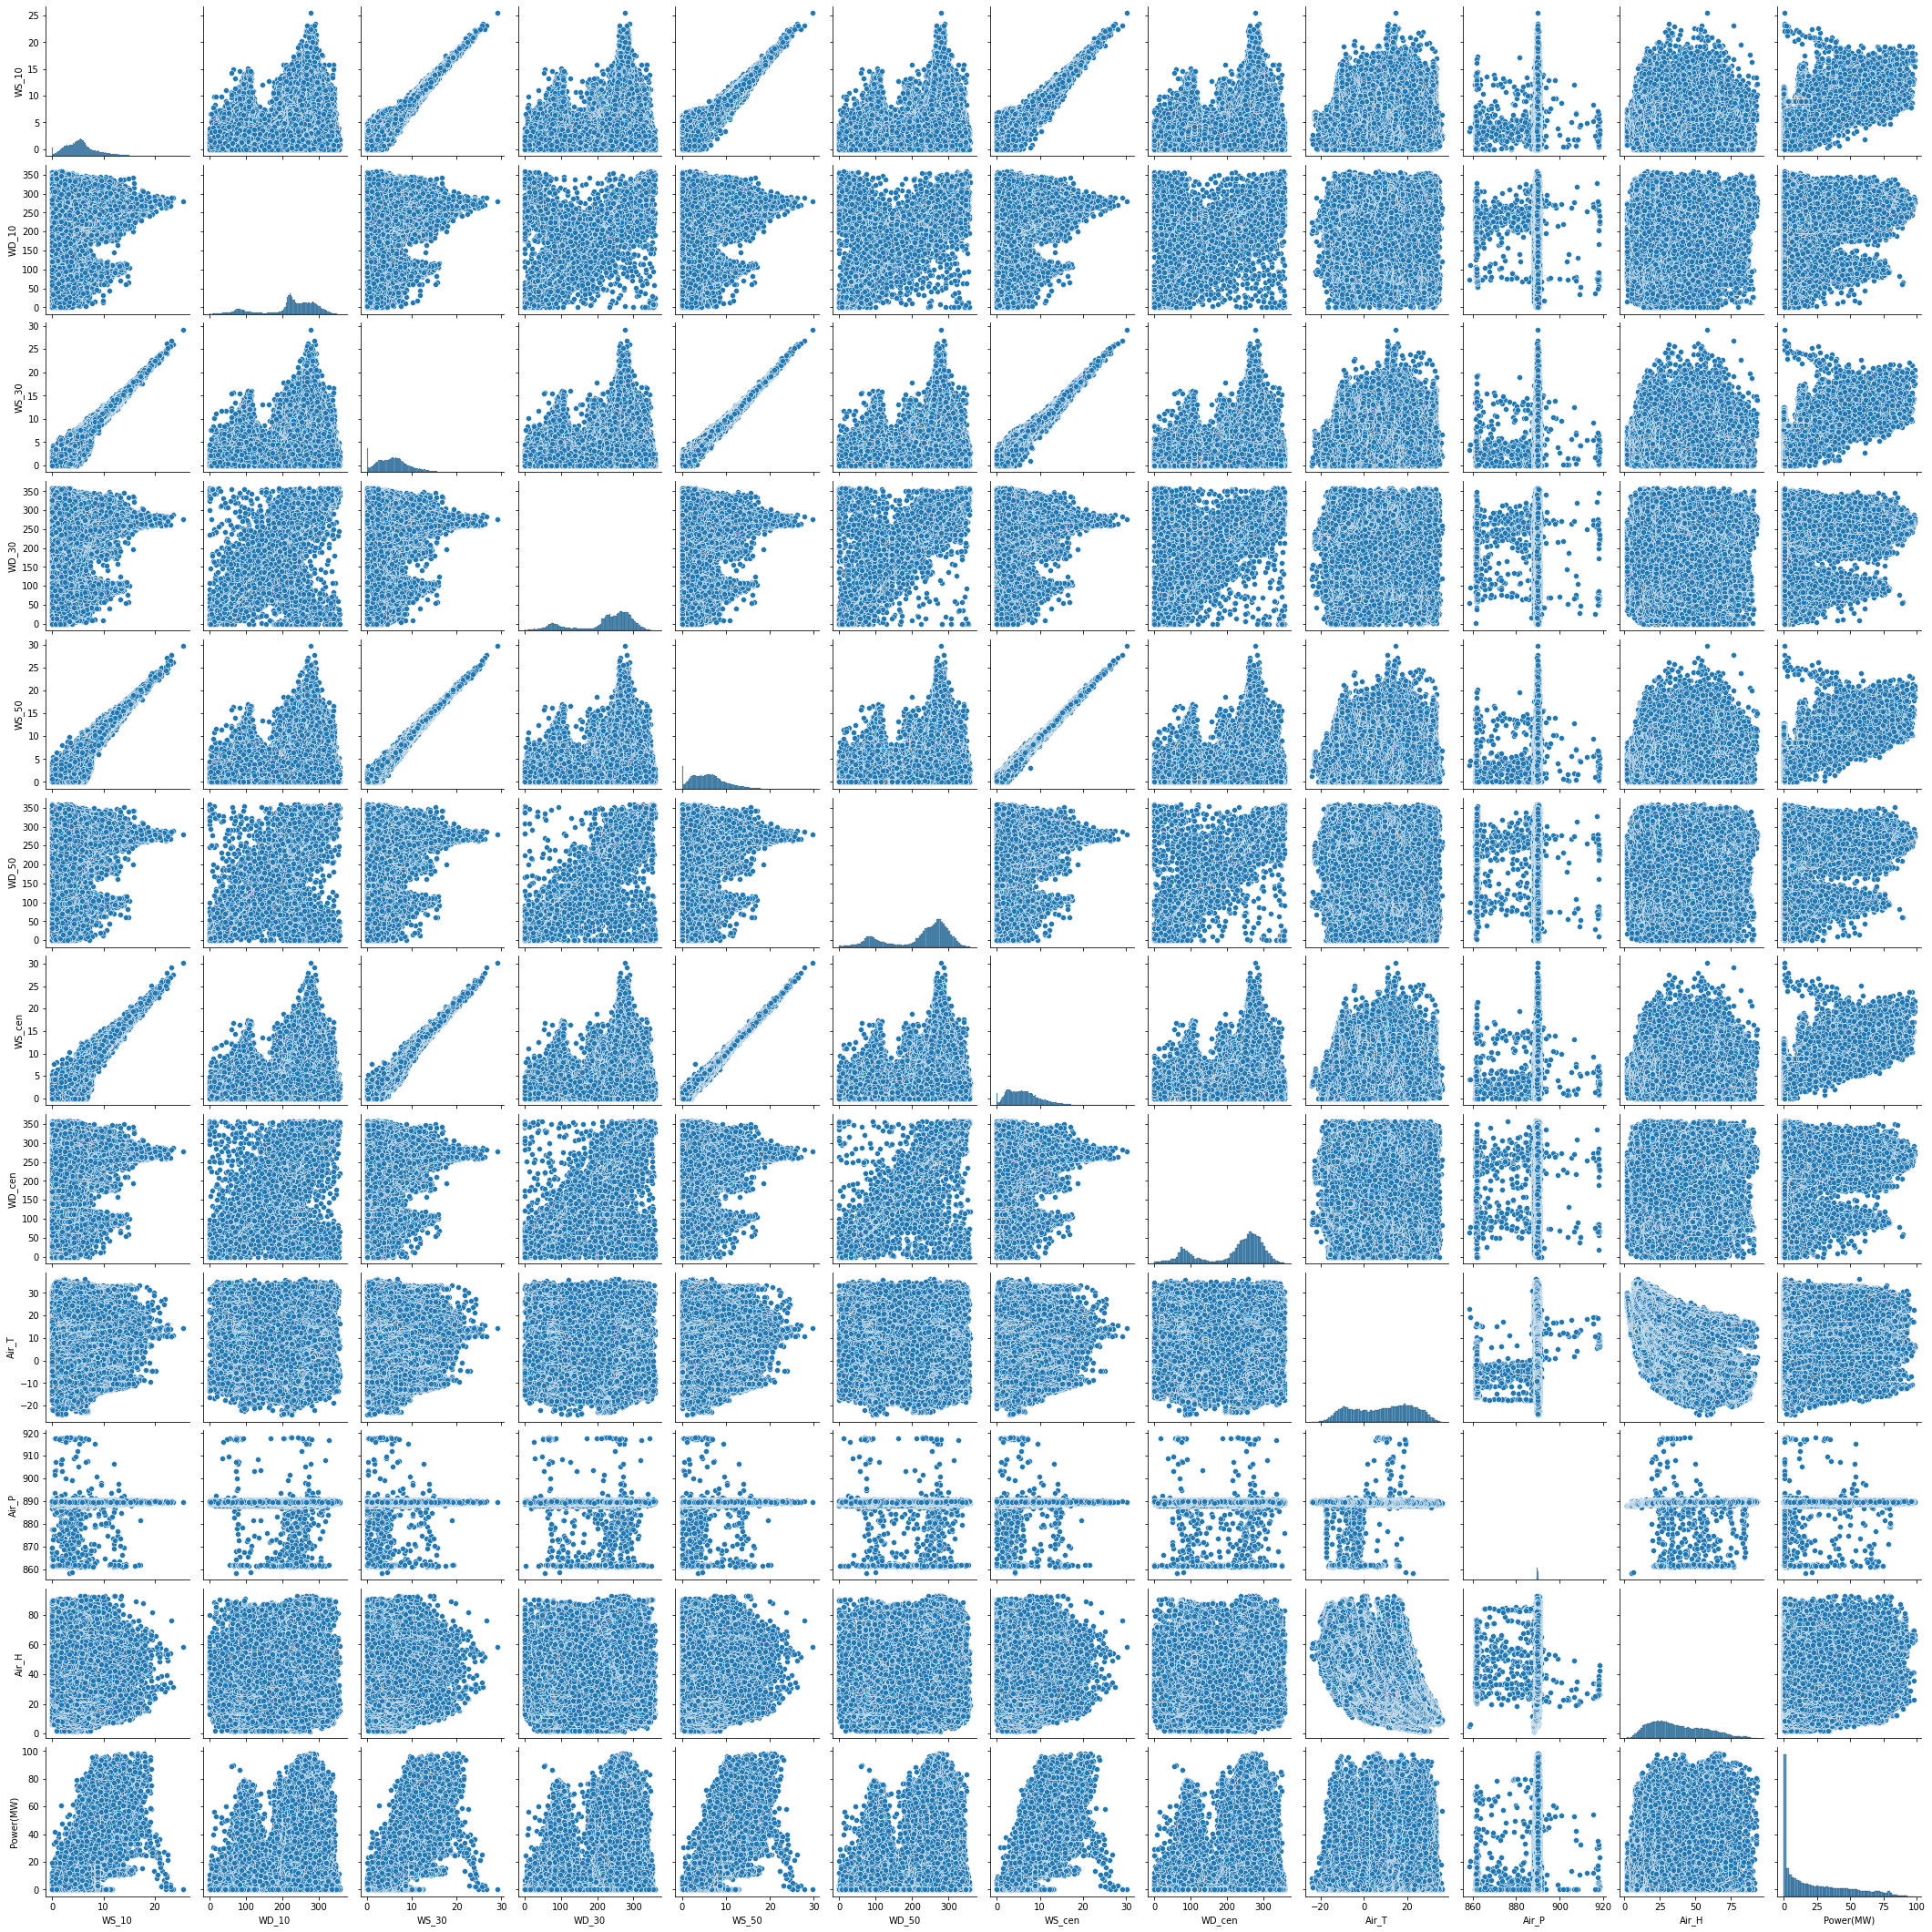

In [7]:
import seaborn as sns
sns.pairplot(Dataset_WF_site1, hue=None, size=2.5)

In [8]:
Dataset_WF_site1.corr().round(2)

WS_10  WD_10  WS_30  WD_30  WS_50  WD_50  WS_cen  WD_cen  Air_T  \
WS_10       1.00   0.38   0.97   0.42   0.95   0.45    0.93    0.46   0.25   
WD_10       0.38   1.00   0.37   0.91   0.37   0.88    0.38    0.84   0.21   
WS_30       0.97   0.37   1.00   0.42   0.99   0.46    0.98    0.48   0.28   
WD_30       0.42   0.91   0.42   1.00   0.41   0.94    0.40    0.90   0.23   
WS_50       0.95   0.37   0.99   0.41   1.00   0.44    0.99    0.47   0.29   
WD_50       0.45   0.88   0.46   0.94   0.44   1.00    0.43    0.95   0.25   
WS_cen      0.93   0.38   0.98   0.40   0.99   0.43    1.00    0.46   0.30   
WD_cen      0.46   0.84   0.48   0.90   0.47   0.95    0.46    1.00   0.27   
Air_T       0.25   0.21   0.28   0.23   0.29   0.25    0.30    0.27   1.00   
Air_P       0.03   0.01   0.05   0.02   0.06   0.03    0.05    0.04   0.06   
Air_H      -0.02   0.06  -0.01   0.03  -0.01   0.02   -0.02    0.01  -0.64   
Power(MW)   0.80   0.34   0.84   0.36   0.86   0.39    0.86    0.40   0.22   

           Air_P  Air_H  Power(MW)  
WS_10       0.03  -0.02       0.80  
WD_10       0.01   0.06       0.34  
WS_30       0.05  -0.01       0.84  
WD_30       0.02   0.03       0.36  
WS_50       0.06  -0.01       0.86  
WD_50       0.03   0.02       0.39  
WS_cen      0.05  -0.02       0.86  
WD_cen      0.04   0.01       0.40  
Air_T       0.06  -0.64       0.22  
Air_P       1.00   0.02       0.05  
Air_H       0.02   1.00       0.03  
Power(MW)   0.05   0.03       1.00

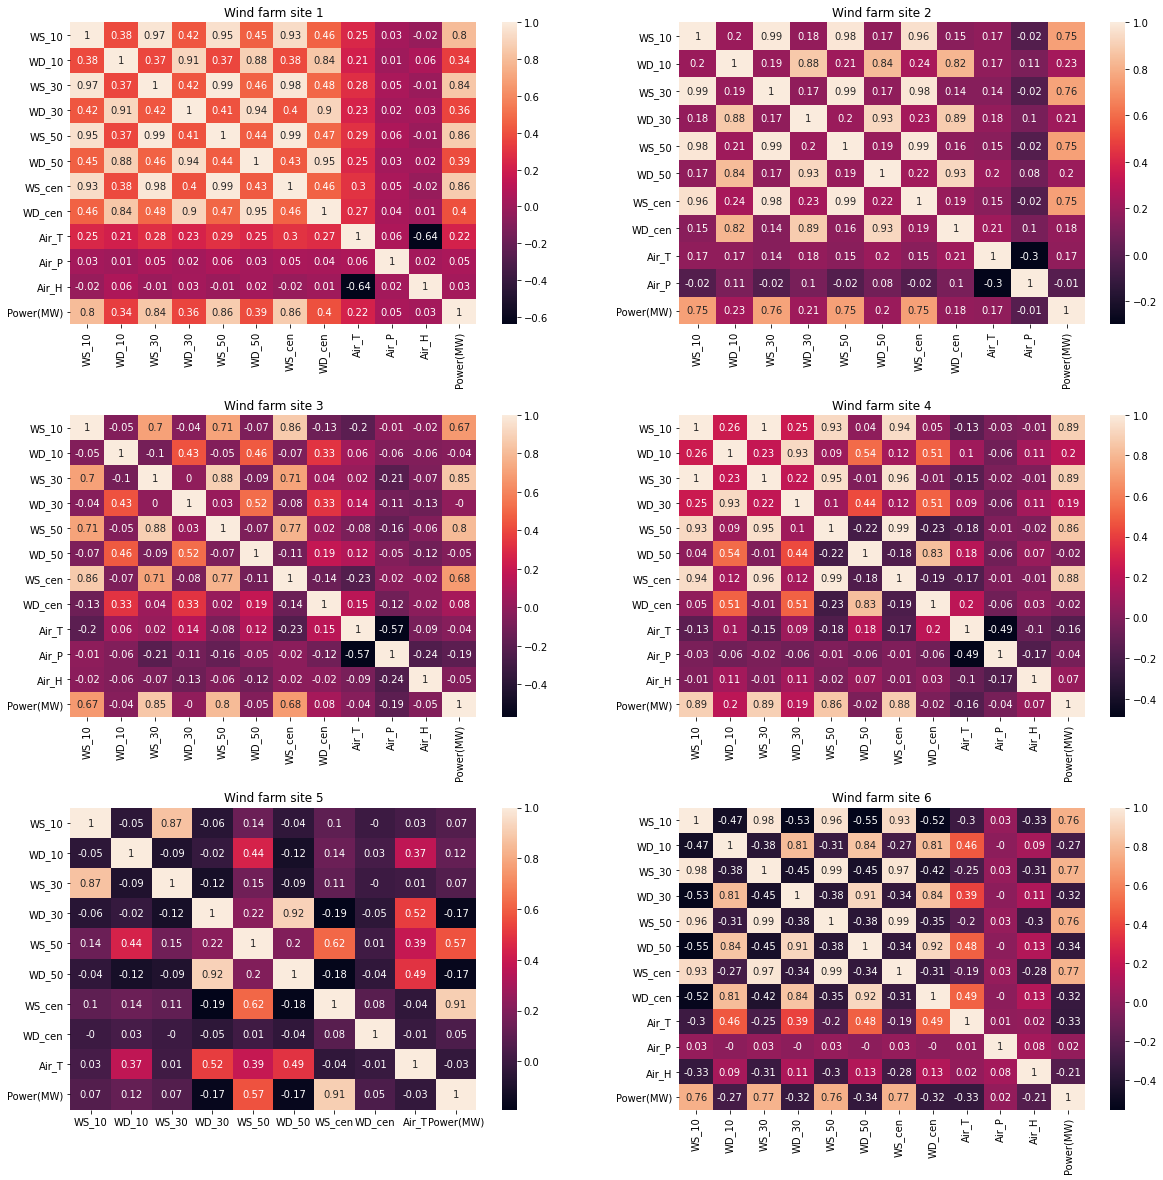

In [9]:
from matplotlib import pyplot as plt
import math
from pylab import *
fig, axes = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6],
                  range(6)):
    sns.heatmap(data.corr().round(2),annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Wind farm site {i+1}')
plt.savefig('./Figures/WF_correlation')

# the analysis of the solar stations

In [10]:
# upload the data from .xslx files
import pandas as pd
Dataset_SS_site1 = pd.read_excel(r'data_processed/solar_stations/Solar station site 1 (Nominal capacity-50MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site2 = pd.read_excel(r'data_processed/solar_stations/Solar station site 2 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site3 = pd.read_excel(r'data_processed/solar_stations/Solar station site 3 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site4 = pd.read_excel(r'data_processed/solar_stations/Solar station site 4 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site5 = pd.read_excel(r'data_processed/solar_stations/Solar station site 5 (Nominal capacity-110MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site6 = pd.read_excel(r'data_processed/solar_stations/Solar station site 6 (Nominal capacity-35MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site7 = pd.read_excel(r'data_processed/solar_stations/Solar station site 7 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site8 = pd.read_excel(r'data_processed/solar_stations/Solar station site 8 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)

C:\Users\Q\AppData\Local\Temp/ipykernel_2648/4012213449.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Dataset_SS_site4 = pd.read_excel(r'data_processed/solar_stations/Solar station site 4 (Nominal capacity-130MW).xlsx'


In [11]:
Dataset_SS_site1.head()

Time(year-month-day h:m:s)  Total solar irradiance (W/m2)  \
1        2019-01-01 00:15:00                              0   
2        2019-01-01 00:30:00                              0   
3        2019-01-01 00:45:00                              0   
4        2019-01-01 01:00:00                              0   
5        2019-01-01 01:15:00                              0   

   Direct normal irradiance (W/m2)  Global horizontal irradiance (W/m2)  \
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   
5                                0                                    0   

   Air temperature  (°C)   Atmosphere (hpa)  Power (MW)  
1                   -11.8             930.5         0.0  
2                   -11.4             930.5         0.0  
3                   -11.5             930.5         0.0  
4                   -11.5             930.4         0.0  
5                   -11.8             930.1         0.0

In [12]:
for dataset in [Dataset_SS_site4, Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]:
    dataset.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']
    
for dataset in [Dataset_SS_site3]:
    dataset.columns=['time','TSI','DNI','GHI','Air_P','Air_H','Power(MW)']  

for dataset in [Dataset_SS_site1, Dataset_SS_site2]:
    dataset.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Power(MW)']

In [13]:
Dataset_SS_site6.head()

time  TSI  DNI  GHI      Air_T      Air_P      Air_H  \
1 2019-01-01 00:15:00  0.0  0.0  0.0  11.600000  837.25336  54.760000   
2 2019-01-01 00:30:00  0.0  0.0  0.0  11.360000  837.21330  57.160000   
3 2019-01-01 00:45:00  0.0  0.0  0.0  11.313334  837.20000  58.733334   
4 2019-01-01 01:00:00  0.0  0.0  0.0  11.260000  837.09330  59.933334   
5 2019-01-01 01:15:00  0.0  0.0  0.0  10.933333  836.94666  62.113335   

   Power(MW)  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0

In [14]:
# outliers processing
Dataset_SS_site7.isnull().sum()

time         0
TSI          0
DNI          0
GHI          0
Air_T        0
Air_P        0
Air_H        0
Power(MW)    0
dtype: int64

In [15]:
Dataset_SS_site5.replace('--', 'NaN', inplace=True)
Dataset_SS_site6.replace('<NULL>', 'NaN', inplace=True)
Dataset_SS_site7.replace('<NULL>', 'NaN', inplace=True)
# Dataset_SS_site5.dropna(how='any', inplace=True)
# Dataset_SS_site6.dropna(how='any', inplace=True)
# Dataset_SS_site7.dropna(how='any', inplace=True)

In [16]:
for dataset in [Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7]:
    for tile in ['TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']:
        dataset[tile]= dataset[tile].astype('float')

In [17]:
Dataset_SS_site5.dropna(how='any', inplace=True)
Dataset_SS_site5.loc[10310:10315,:]

time    TSI    DNI    GHI  Air_T   Air_P  Air_H  \
10310 2019-04-18 09:30:00  666.0  591.0  555.0   26.8  1002.0   51.2   
10311 2019-04-18 09:45:00  761.0  650.0  629.0   28.0  1002.1   46.5   
10312 2019-04-18 10:00:00  797.0  674.0  662.0   28.5  1002.4   43.6   
10313 2019-04-18 10:15:00  763.0  658.0  627.0   29.5  1002.4   41.5   
10314 2019-04-18 10:30:00  778.0  682.0  649.0   29.2  1002.4   40.9   
10315 2019-04-18 10:45:00  913.0  746.0  757.0   29.5  1002.3   37.8   

       Power(MW)  
10310      57.65  
10311      65.58  
10312      69.85  
10313      66.78  
10314      71.11  
10315      77.25

In [18]:
Dataset_SS_site6.loc[5320:5330,:]

time         TSI        DNI         GHI      Air_T  \
5320 2019-02-25 10:00:00   605.60000  799.20000   68.466670  17.806667   
5321 2019-02-25 10:15:00   659.53330  828.40000   77.733330  18.240000   
5322 2019-02-25 10:30:00   724.66670  860.60000   88.200000  18.486666   
5323 2019-02-25 10:45:00   760.46670  851.93335   92.933334  18.926666   
5324 2019-02-25 11:00:00   760.46670  851.93335   92.933334  18.926666   
5325 2019-02-25 11:15:00   760.46670  851.93335   92.933334  18.926666   
5326 2019-02-25 11:30:00   944.73334  862.66670  111.600000  19.860000   
5327 2019-02-25 11:45:00   965.26666  851.80000  114.933334  20.446667   
5328 2019-02-25 12:00:00   996.33330  853.86664  119.200000  20.853333   
5329 2019-02-25 12:15:00  1042.00000  861.86664  123.533330  21.046667   
5330 2019-02-25 12:30:00  1084.86670  861.26666  126.466670  21.373333   

          Air_P      Air_H  Power(MW)  
5320  832.12000  26.840000  15.264000  
5321  832.01330  25.013334  17.448668  
5322  832.00000  23.886667  19.428667  
5323  831.74664  22.846666  20.671333  
5324  831.74664  22.846666  20.671333  
5325  831.74664  22.846666  20.671333  
5326  831.46000  21.246666  24.822666  
5327  831.56665  20.933332  25.630000  
5328  831.32000  20.680000  26.531334  
5329  831.21330  20.486666  27.445333  
5330  830.70000  19.960000  28.079334

In [19]:
Dataset_SS_site5.dtypes

time         datetime64[ns]
TSI                 float64
DNI                 float64
GHI                 float64
Air_T               float64
Air_P               float64
Air_H               float64
Power(MW)           float64
dtype: object

In [20]:
'--' in Dataset_SS_site5

False

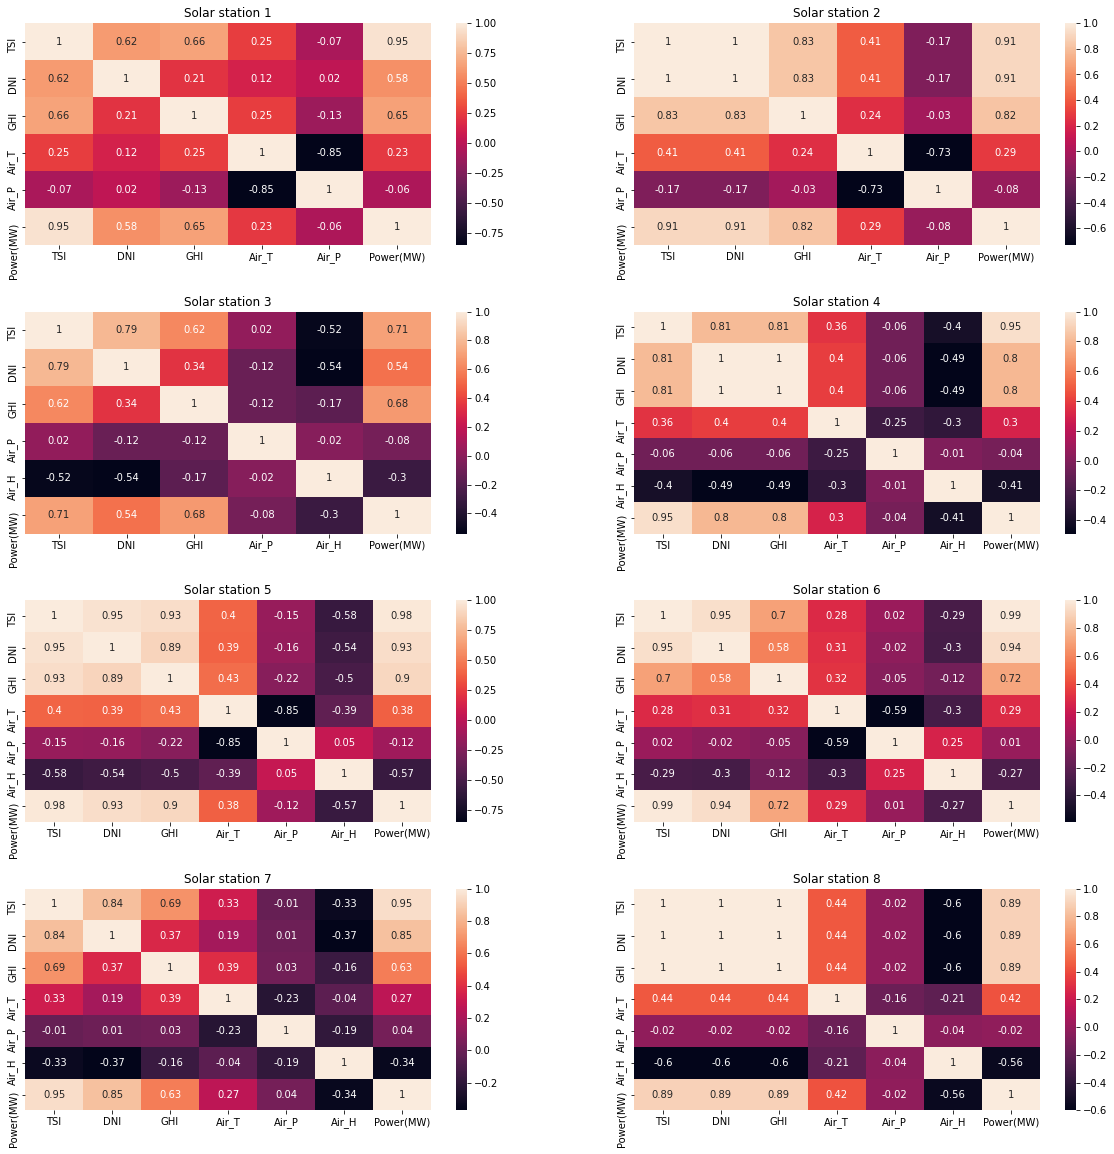

In [21]:
fig, axes = plt.subplots(4,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                   ,Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8],
                  range(8)):
    sns.heatmap(data.corr().round(2), annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Solar station {i+1}')
plt.savefig('./Figures/SS_correlation')